<a href="https://colab.research.google.com/github/gabopy-glitch/Aprendizaje-Autom-tico/blob/main/Agrupamiento_Jerarquico_Piedra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/03-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Gabriel Piedra &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [99]:
pip install pyreadstat

In [130]:
# Paquetes necesarios
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [101]:
df, meta = pyreadstat.read_sav("/egresos_hospitalarios_2024.sav")

display(df.head())
print()
display(df.describe())
print("Codificación:")
display(meta.value_labels)

,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10
0,24,2.0,1.0,2.0,218,1.0,3.0,4.0,6.0,7.0,1.0,24,2.0,2024-05-08,2024-05-09,1.0,1.0,52.0,U072
1,09,1.0,1.0,2.0,218,1.0,4.0,81.0,6.0,7.0,1.0,09,1.0,2023-12-30,2024-01-02,3.0,1.0,52.0,U071
2,09,1.0,1.0,2.0,218,2.0,4.0,88.0,6.0,7.0,1.0,09,1.0,2024-01-09,2024-01-11,2.0,1.0,52.0,U071
3,09,1.0,1.0,2.0,218,2.0,4.0,82.0,6.0,7.0,1.0,09,1.0,2024-01-15,2024-01-19,4.0,1.0,52.0,U071
4,01,1.0,1.0,2.0,218,1.0,4.0,1.0,6.0,7.0,1.0,01,1.0,2024-02-08,2024-02-13,5.0,1.0,52.0,U072


,area_ubi,tipo,sector,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,area_res,dia_estad,con_egrpa,esp_egrpa
count,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06,1.132667e+06
mean,1.031965e+00,1.934313e+00,1.417680e+00,1.613196e+00,3.881468e+00,3.786913e+01,6.263744e+00,5.393826e+00,2.310900e+00,1.162172e+00,4.540713e+00,1.027827e+00,2.712600e+01
std,1.759077e-01,1.657115e+00,6.254063e-01,4.870183e-01,5.233749e-01,2.405094e+01,1.511975e+00,2.500827e+00,2.929101e+00,3.686088e-01,2.851032e+01,2.267408e-01,1.472591e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.000000e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.700000e+01
50%,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,3.300000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.700000e+01
75%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,5.700000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,4.100000e+01
max,2.000000e+00,5.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,1.150000e+02,9.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,1.904000e+04,3.000000e+00,5.200000e+01


Codificación:


{'labels0': {'10': 'Imbabura',
  '20': 'Galápagos',
  '01': 'Azuay',
  '11': 'Loja',
  '21': 'Sucumbíos',
  '02': 'Bolívar',
  '12': 'Los Ríos',
  '22': 'Orellana',
  '03': 'Cañar',
  '13': 'Manabí',
  '23': 'Santo Domingo de los Tsáchilas',
  '04': 'Carchi',
  '14': 'Morona Santiago',
  '24': 'Santa Elena',
  '05': 'Cotopaxi',
  '15': 'Napo',
  '06': 'Chimborazo',
  '16': 'Pastaza',
  '07': 'El Oro',
  '17': 'Pichincha',
  '08': 'Esmeraldas',
  '18': 'Tungurahua',
  '09': 'Guayas',
  '19': 'Zamora Chinchipe'},
 'labels1': {1.0: 'Urbana', 2.0: 'Rural'},
 'labels2': {1.0: 'Agudo',
  2.0: 'Crónico',
  3.0: 'Clínicas generales sin especialidad',
  4.0: 'Establecimientos sin internación',
  5.0: 'Sin tipo hospitales básicos'},
 'labels3': {1.0: 'Público',
  2.0: 'Privado con fines de lucro',
  3.0: 'Privado sin fines de lucro'},
 'labels4': {1.0: 'Hombre', 2.0: 'Mujer', 3.0: 'Indeterminado'},
 'labels5': {1.0: 'Horas (1 a 23 horas de edad)',
  2.0: 'Días (1 a 28 días de edad)',
  3.0: 'Mes

Para este ejercicio se seguiran 2 caminos:

1. Usar las variables númericas edad y días de estadía
2. Usar las variables relacionadas al perfil del paciente como su área de residencia, su condición de egreso, su sexo, etc. Las variables ya se encuentran códificadas y no deberían dsitorcionar la data si se usan las variables numéricas como base.

In [102]:
#Definimos la muestra
df_sample = df.sample(n=5000, random_state=6)

#Variables númericas
X_num = df_sample[["edad", "dia_estad"]]
X_scaled1 = StandardScaler().fit_transform(X_num)
print("Escalados numéricos")
display(X_scaled1)

#Variables numéricas y categóricas (codificadas)
vars_paciente = ["edad", "dia_estad", "sexo", "area_res", "con_egrpa", "etnia", "dis_pac"]
X = df_sample[vars_paciente]
X_scaled2 = StandardScaler().fit_transform(X)
print("Escalados numéricos y categóricos")
display(X_scaled2)

Escalados numéricos


array([[ 1.21116041, -0.49526335],
       [-1.04104391, -0.05581051],
       [-0.66567652, -0.20229479],
       ...,
       [ 0.16847322, -0.49526335],
       [-1.12445888,  0.38364233],
       [-0.66567652,  0.23715805]])

Escalados numéricos y categóricos


array([[ 1.21116041, -0.49526335, -1.28824472, ..., -0.12240913,
        -0.15484836, -0.43850753],
       [-1.04104391, -0.05581051,  0.77625003, ..., -0.12240913,
        -0.15484836, -0.43850753],
       [-0.66567652, -0.20229479,  0.77625003, ..., -0.12240913,
        -2.11826791, -0.43850753],
       ...,
       [ 0.16847322, -0.49526335,  0.77625003, ..., -0.12240913,
         1.8085712 ,  2.33597859],
       [-1.12445888,  0.38364233,  0.77625003, ..., -0.12240913,
        -0.15484836, -0.43850753],
       [-0.66567652,  0.23715805,  0.77625003, ..., -0.12240913,
         1.15409802, -0.43850753]])

---
## <font color='264CC7'> Dendograma </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Genera el dendograma de los datos.
<ul>
  <li>Usa diferentes métricas y funciones de enlace.</li>
  <li>Toma una distancia de corte.</li>
  <li>De manera intutiva, ¿por qué tomaste la métrica y la distancia de corte?</li>
</ul>
</div>

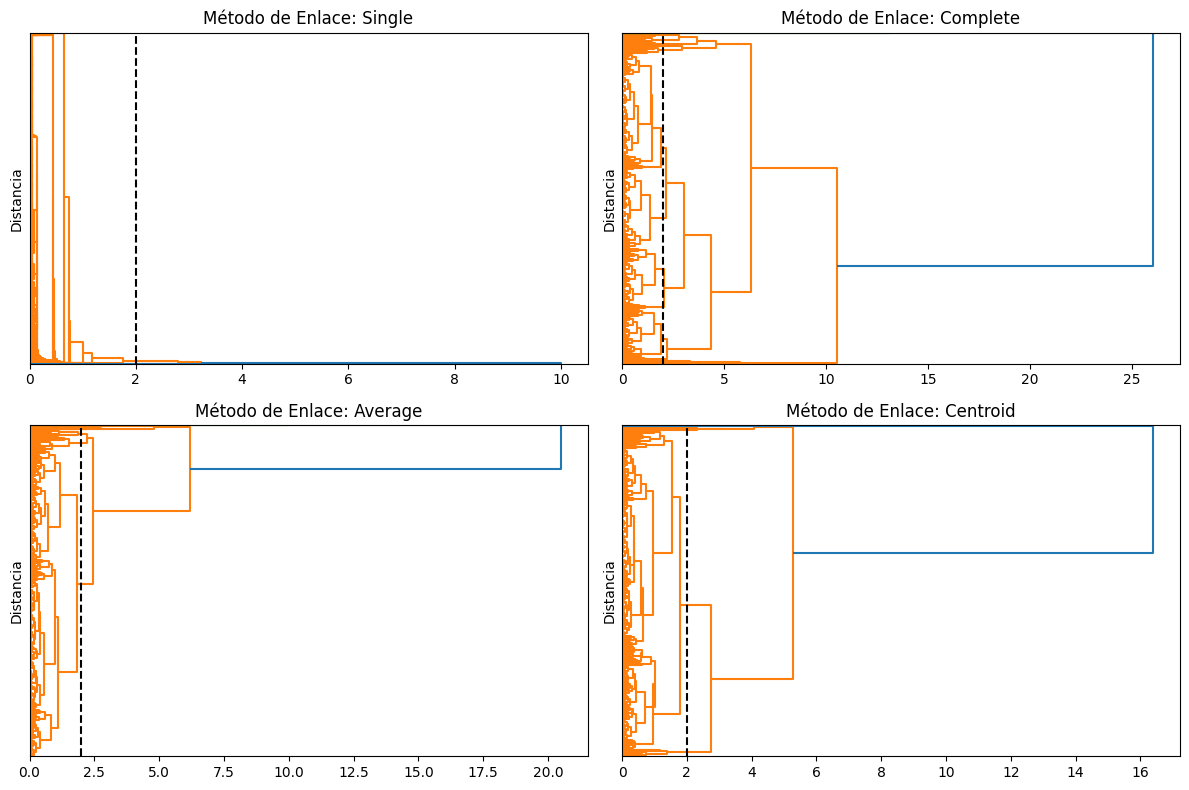

In [103]:
#Distancia de corte
dc = 2

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Métodos de enlace
methods = ['single', 'complete', 'average', 'centroid']

# Generar dendrogramas en subplots
for i, method in enumerate(methods):
    # Calculate linkage matrix for each method directly from the scaled data
    linkage_matrix = linkage(X_scaled1, method=method, metric="euclidean")
    dendrogram(linkage_matrix, ax=axes[i], no_labels=True, orientation='right')
    axes[i].axvline(x=dc, c='k', ls='--')
    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

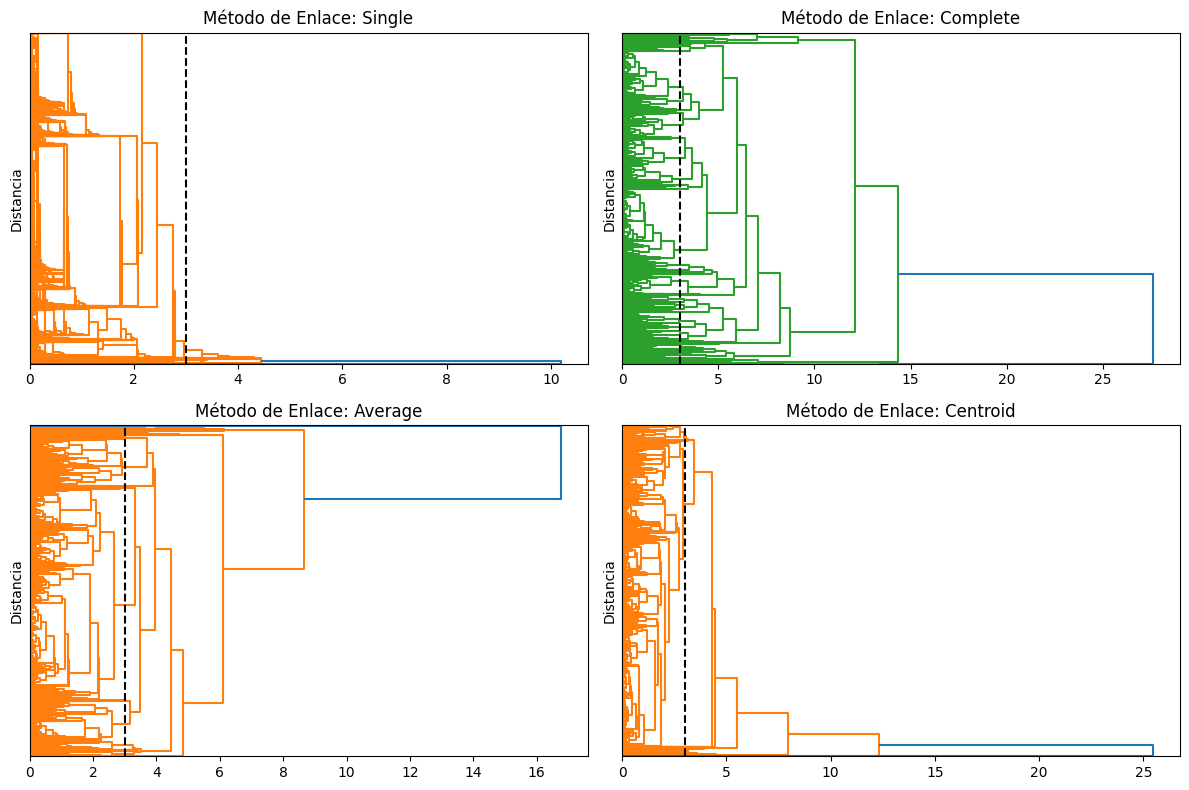

In [104]:
#Distancia de corte
dc = 3

# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Métodos de enlace
methods = ['single', 'complete', 'average', 'centroid']

# Generar dendogramas en subplots
for i, method in enumerate(methods):
    linkage_matrix = linkage(X_scaled2, method=method, metric="euclidean")
    dendrogram(linkage_matrix, ax=axes[i], no_labels=True, orientation='right')
    axes[i].axvline(x=dc, c='k', ls='--')
    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

Al trabajar con todos los registros la sesión colapsa, por lo se usará una muestra (las modificaciones se notarán en bloques superiores)

Por lo visto en los dendrogramas para ambos casos puedo decir que el agrupamiento funciona mejor incluyendo mis variables categóricas. Viendo los gráficos de este puedo ver que el método "complete" genera grupos más homogeneos, por lo que usaré este. Así mismo se usa distancia euclidea para que funcione con todos los métodos, esto cambiará posteriormente para obtener diferentes resultados.

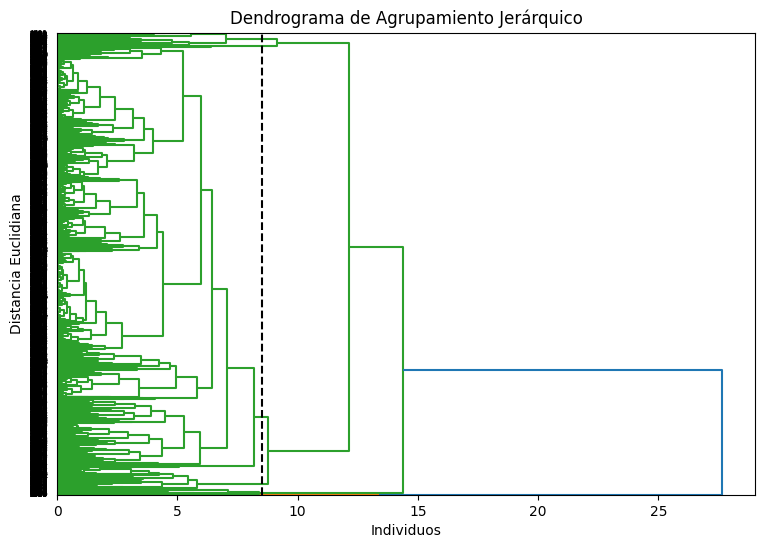

In [136]:
# Realizamos el clustering jerárquico
Z = linkage(X_scaled2, method='complete', metric="euclidean")

# Definir la distancia de corte
distancia_corte = 8.5

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

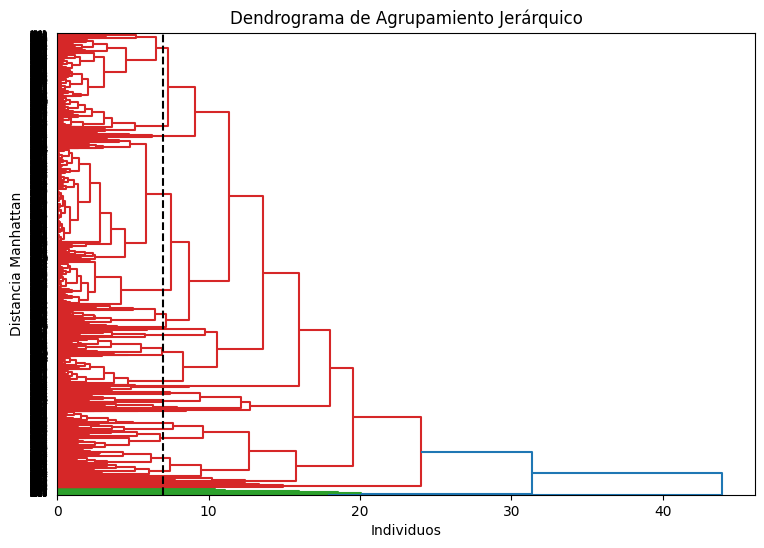

In [106]:
# Realizamos el clustering jerárquico
Z = linkage(X_scaled2, method='complete', metric="cityblock")

# Definir la distancia de corte
distancia_corte = 7

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Manhattan")
plt.show()

El dendograma usando complete y distancia euclidea sigue siendo el que mejor resultado me da al momento de formar los clusters. En cuanto a la distancia, se usa 8.5 al darme una catidad suficiente, pero no exagerada de clústers.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [139]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
df_sample['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(df_sample.head())

,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
978334,09,1.0,1.0,1.0,218,1.0,4.0,67.0,6.0,7.0,1.0,09,1.0,2024-04-11,2024-04-12,1.0,1.0,7.0,E115,C5
895465,17,1.0,5.0,2.0,218,2.0,4.0,13.0,6.0,1.0,1.0,17,1.0,2024-02-07,2024-02-11,4.0,1.0,10.0,K37,C5
790771,21,1.0,1.0,1.0,218,2.0,4.0,22.0,3.0,7.0,1.0,21,1.0,2024-10-21,2024-10-24,3.0,1.0,21.0,O689,C4
743020,12,1.0,5.0,1.0,218,2.0,4.0,13.0,6.0,7.0,1.0,12,2.0,2024-10-29,2024-10-29,1.0,1.0,21.0,O990,C5
35811,17,1.0,1.0,1.0,218,2.0,4.0,80.0,9.0,5.0,1.0,17,1.0,2024-02-21,2024-03-01,9.0,1.0,51.0,S819,C5


In [140]:
# Cantidades de elementos por clúster
df_sample['Cluster'].value_counts()

,count
Cluster,
C5,4544
C4,239
C7,143
C3,60
C6,10
C1,3
C2,1


In [141]:
# Podemos ver las medias de cada clúster
df_sample.groupby('Cluster')[vars_paciente].mean()

,edad,dia_estad,sexo,area_res,con_egrpa,etnia,dis_pac
Cluster,,,,,,,
C1,31.666667,95.666667,1.333333,1.000000,1.000000,6.000000,3.000000
C2,38.000000,178.000000,1.000000,1.000000,1.000000,6.000000,1.000000
C3,64.550000,8.183333,1.483333,1.133333,3.000000,6.333333,2.333333
C4,32.949791,3.225941,1.719665,1.368201,1.000000,1.401674,1.435146
C5,37.541813,3.482835,1.627201,1.147007,1.003961,6.489437,2.338688
C6,32.400000,58.500000,1.600000,1.300000,1.000000,6.500000,4.200000
C7,49.006993,26.342657,1.433566,1.153846,1.000000,6.230769,1.118881


In [142]:
# Podemos ver los mínimos de cada clúster
display(df_sample.groupby('Cluster')[vars_paciente].min())
# Y también los máximos
display(df_sample.groupby('Cluster')[vars_paciente].max())

,edad,dia_estad,sexo,area_res,con_egrpa,etnia,dis_pac
Cluster,,,,,,,
C1,16.0,88.0,1.0,1.0,1.0,3.0,1.0
C2,38.0,178.0,1.0,1.0,1.0,6.0,1.0
C3,1.0,2.0,1.0,1.0,3.0,1.0,1.0
C4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
C5,1.0,1.0,1.0,1.0,1.0,5.0,1.0
C6,12.0,41.0,1.0,1.0,1.0,2.0,1.0
C7,1.0,13.0,1.0,1.0,1.0,6.0,1.0


,edad,dia_estad,sexo,area_res,con_egrpa,etnia,dis_pac
Cluster,,,,,,,
C1,57.0,110.0,2.0,1.0,1.0,9.0,7.0
C2,38.0,178.0,1.0,1.0,1.0,6.0,1.0
C3,96.0,39.0,2.0,2.0,3.0,9.0,9.0
C4,94.0,21.0,2.0,2.0,1.0,5.0,9.0
C5,102.0,34.0,2.0,2.0,2.0,9.0,9.0
C6,66.0,69.0,2.0,2.0,1.0,9.0,9.0
C7,98.0,52.0,2.0,2.0,1.0,9.0,9.0


In [143]:
# Mostremos los nombres de 5 pacientes de cada clúster
for cluster in df_sample['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {df_sample[df_sample["Cluster"] == cluster].shape[0]}')
    display(df_sample[df_sample['Cluster'] == cluster].head(5))

Cluster C5: cantidad de elementos 4544


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
978334,09,1.0,1.0,1.0,218,1.0,4.0,67.0,6.0,7.0,1.0,09,1.0,2024-04-11,2024-04-12,1.0,1.0,7.0,E115,C5
895465,17,1.0,5.0,2.0,218,2.0,4.0,13.0,6.0,1.0,1.0,17,1.0,2024-02-07,2024-02-11,4.0,1.0,10.0,K37,C5
743020,12,1.0,5.0,1.0,218,2.0,4.0,13.0,6.0,7.0,1.0,12,2.0,2024-10-29,2024-10-29,1.0,1.0,21.0,O990,C5
35811,17,1.0,1.0,1.0,218,2.0,4.0,80.0,9.0,5.0,1.0,17,1.0,2024-02-21,2024-03-01,9.0,1.0,51.0,S819,C5
458802,12,1.0,5.0,1.0,218,2.0,4.0,19.0,6.0,7.0,1.0,12,1.0,2024-01-03,2024-01-09,6.0,1.0,27.0,K830,C5


Cluster C4: cantidad de elementos 239


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
790771,21,1.0,1.0,1.0,218,2.0,4.0,22.0,3.0,7.0,1.0,21,1.0,2024-10-21,2024-10-24,3.0,1.0,21.0,O689,C4
122772,17,1.0,1.0,1.0,218,2.0,4.0,55.0,1.0,1.0,1.0,17,1.0,2024-11-27,2024-11-29,2.0,1.0,48.0,N133,C4
280338,17,1.0,5.0,1.0,218,2.0,2.0,3.0,2.0,7.0,1.0,17,2.0,2024-10-14,2024-10-16,2.0,1.0,41.0,P599,C4
972852,15,1.0,1.0,1.0,218,2.0,4.0,47.0,1.0,7.0,1.0,15,2.0,2024-08-05,2024-08-08,3.0,1.0,7.0,K800,C4
367244,17,1.0,1.0,1.0,218,2.0,4.0,58.0,3.0,7.0,1.0,17,1.0,2024-05-12,2024-05-16,4.0,1.0,37.0,C182,C4


Cluster C3: cantidad de elementos 60


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
445158,18,1.0,1.0,1.0,218,2.0,4.0,76.0,6.0,1.0,1.0,18,1.0,2024-06-14,2024-06-16,2.0,3.0,28.0,J449,C3
596591,13,1.0,5.0,1.0,218,2.0,4.0,93.0,6.0,1.0,1.0,13,1.0,2024-10-15,2024-10-17,2.0,3.0,27.0,K922,C3
29208,11,1.0,1.0,2.0,218,1.0,4.0,81.0,6.0,7.0,1.0,11,1.0,2024-12-20,2024-12-23,3.0,3.0,52.0,A418,C3
33352,17,1.0,2.0,3.0,218,2.0,4.0,13.0,6.0,1.0,9.0,17,1.0,2024-04-26,2024-04-28,2.0,3.0,52.0,C402,C3
843484,10,1.0,1.0,1.0,218,1.0,4.0,96.0,9.0,2.0,9.0,10,1.0,2024-09-03,2024-09-06,3.0,3.0,19.0,I608,C3


Cluster C7: cantidad de elementos 143


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
601549,09,1.0,1.0,1.0,218,1.0,4.0,54.0,6.0,7.0,1.0,09,1.0,2024-10-11,2024-11-14,34.0,1.0,23.0,E115,C7
385673,09,1.0,1.0,1.0,218,1.0,4.0,64.0,6.0,7.0,1.0,09,1.0,2024-06-18,2024-07-01,13.0,1.0,34.0,I635,C7
864148,17,1.0,1.0,1.0,218,1.0,4.0,41.0,6.0,7.0,1.0,17,1.0,2024-09-15,2024-10-08,23.0,1.0,17.0,A064,C7
201557,17,1.0,1.0,1.0,218,1.0,4.0,29.0,6.0,7.0,1.0,17,2.0,2024-08-19,2024-09-03,15.0,1.0,47.0,T814,C7
1112890,11,1.0,1.0,1.0,218,1.0,4.0,73.0,6.0,1.0,1.0,11,1.0,2024-02-01,2024-02-20,19.0,1.0,3.0,I500,C7


Cluster C6: cantidad de elementos 10


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
1112317,09,1.0,1.0,3.0,218,2.0,4.0,46.0,9.0,1.0,9.0,12,1.0,2024-01-12,2024-03-18,66.0,1.0,3.0,A419,C6
218076,17,1.0,2.0,2.0,218,2.0,4.0,16.0,6.0,1.0,9.0,17,1.0,2024-02-07,2024-03-28,50.0,1.0,44.0,F449,C6
439255,17,1.0,1.0,1.0,218,1.0,2.0,12.0,6.0,7.0,1.0,06,1.0,2024-06-24,2024-08-31,68.0,1.0,29.0,P220,C6
906731,01,1.0,2.0,3.0,218,1.0,4.0,37.0,6.0,7.0,1.0,01,1.0,2024-01-06,2024-03-13,67.0,1.0,9.0,C20,C6
934774,01,1.0,1.0,1.0,218,2.0,4.0,66.0,6.0,7.0,1.0,01,2.0,2023-11-28,2024-02-02,66.0,1.0,7.0,K918,C6


Cluster C1: cantidad de elementos 3


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
218624,17,1.0,2.0,2.0,218,1.0,4.0,16.0,3.0,6.0,1.0,17,1.0,2024-04-17,2024-08-05,110.0,1.0,44.0,G470,C1
869869,09,1.0,1.0,3.0,218,1.0,4.0,57.0,9.0,9.0,7.0,09,1.0,2024-07-04,2024-10-01,89.0,1.0,14.0,J960,C1
602292,09,1.0,1.0,1.0,218,2.0,1.0,22.0,6.0,7.0,1.0,09,1.0,2024-09-27,2024-12-24,88.0,1.0,23.0,Q059,C1


Cluster C2: cantidad de elementos 1


,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
1093372,17,2.0,1.0,1.0,218,1.0,4.0,38.0,6.0,7.0,1.0,17,1.0,2024-06-22,2024-12-17,178.0,1.0,7.0,R579,C2


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Disminuimos la distancia a 8.5 a fin de obntener grupos un poco más homogéneos, pero igualmente informativos, aclarar que como la mayoría del país se considera mestizo esto se mantiene para la mayoría de los clusters, cualquier variacuón estrá en el nombre.

Son:

* C1: Adultos masculinos de larga estadia con discapacidad intelectual.
* C2: Adultos masculinos con larga estancia.
* C3: Adultos mayores con discapacidad física egresados muertos pasados los 2 días.
* C4: Mujeres indígenas adultas.
* C5: Adultos mayoritariamente mujeres con discapacidad física.
* C6: Adultos, mayoritariamente mujeres con discapacidad física.
* C7: Adultos de mediana edad con estancia media.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

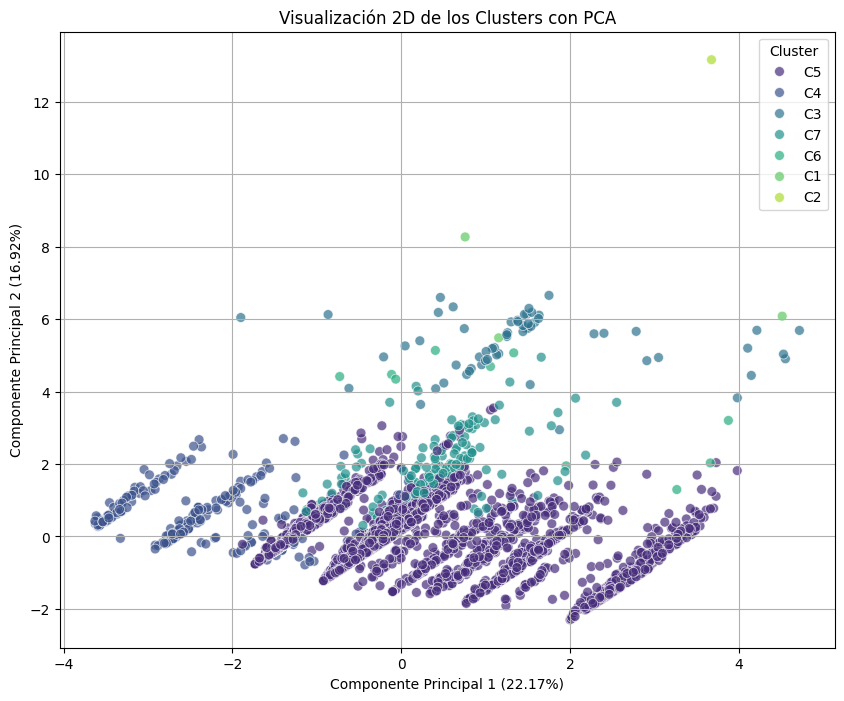

Varianza total explicada por los 2 componentes principales: 39.09%


In [144]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled2)

# Crear un DataFrame para los componentes PCA y los clusters
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = df_sample['Cluster'].reset_index(drop=True)

# Visualizar los clusters en 2D
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', legend='full', s=50, alpha=0.7)
plt.title('Visualización 2D de los Clusters con PCA')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada
total_explained_variance = pca.explained_variance_ratio_.sum() * 100
print(f"Varianza total explicada por los 2 componentes principales: {total_explained_variance:.2f}%")

# Considerar qué tan buenos parecen los grupos y el impacto de la varianza explicada.
# Una baja varianza explicada puede significar que la proyección 2D no representa bien la separación real de los clusters.

Los grupos no se diferencian mucho entre si, al menos C5 que es el grupo más numeroso aparece en varios grupos más, tal vez la seleccion de más clusters ayudaría a mejorar este tema y daría mejores perfiles médicos, pues reducirlo todo a solo 7 grupos no captura toda las diferentes condiciones médicas que presentan las personas.

El resto de grupos se diferencian de mejor manera, aún así podría ser mejor.

En cuanto a la varianza explicada por mis dos componentes el 39% no se considera significativo, por lo que este gráfico se debe tomar con pinzas.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [145]:
# Calculamos la métrica de silueta
sil_score = silhouette_score(X_scaled2, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.33


Poe el resultado de silueta se ve que los clusters podrían mejorar, si bien no son cero, lo que indica un rendimiento mediocre, son relativamente cercanos. se podría intentar aumentar los clusters para mejorar la métrica de silueta

---
## <font color='264CC7'> Iteraciones </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza el proceso de agrupamiento jerárquico con diferentes parámetros, analiza la métrica de la silueta de cada uno e indica cuál es el mejor.
</div>

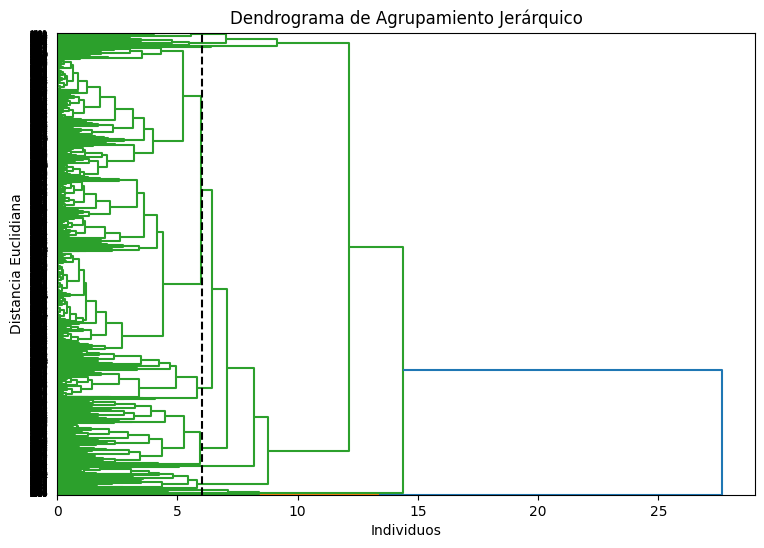

In [164]:
# Realizamos el clustering jerárquico
Z = linkage(X_scaled2, method='complete', metric="euclidean")

# Definir la distancia de corte
distancia_corte = 6

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [165]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
df_sample['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(df_sample.head())

,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
978334,09,1.0,1.0,1.0,218,1.0,4.0,67.0,6.0,7.0,1.0,09,1.0,2024-04-11,2024-04-12,1.0,1.0,7.0,E115,C10
895465,17,1.0,5.0,2.0,218,2.0,4.0,13.0,6.0,1.0,1.0,17,1.0,2024-02-07,2024-02-11,4.0,1.0,10.0,K37,C10
790771,21,1.0,1.0,1.0,218,2.0,4.0,22.0,3.0,7.0,1.0,21,1.0,2024-10-21,2024-10-24,3.0,1.0,21.0,O689,C6
743020,12,1.0,5.0,1.0,218,2.0,4.0,13.0,6.0,7.0,1.0,12,2.0,2024-10-29,2024-10-29,1.0,1.0,21.0,O990,C9
35811,17,1.0,1.0,1.0,218,2.0,4.0,80.0,9.0,5.0,1.0,17,1.0,2024-02-21,2024-03-01,9.0,1.0,51.0,S819,C10


In [166]:
# Cantidades de elementos por clúster
df_sample['Cluster'].value_counts()

,count
Cluster,
C10,3276
C8,713
C9,537
C6,239
C13,104
C14,39
C4,38
C5,19
C7,18


In [167]:
# Podemos ver las medias de cada clúster
df_sample.groupby('Cluster')[vars_paciente].mean()

,edad,dia_estad,sexo,area_res,con_egrpa,etnia,dis_pac
Cluster,,,,,,,
C1,31.666667,95.666667,1.333333,1.000000,1.0,6.000000,3.000000
C10,37.662393,3.443834,1.626984,1.039072,1.0,6.235348,1.007631
C11,33.500000,49.750000,1.750000,1.000000,1.0,8.250000,9.000000
C12,31.666667,64.333333,1.500000,1.500000,1.0,5.333333,1.000000
C13,49.711538,21.009615,1.480769,1.173077,1.0,6.230769,1.086538
C14,47.128205,40.564103,1.307692,1.102564,1.0,6.230769,1.205128
C2,38.000000,178.000000,1.000000,1.000000,1.0,6.000000,1.000000
C3,29.666667,34.666667,2.000000,1.000000,3.0,8.000000,6.333333
C4,77.500000,6.710526,1.368421,1.000000,3.0,6.578947,2.473684


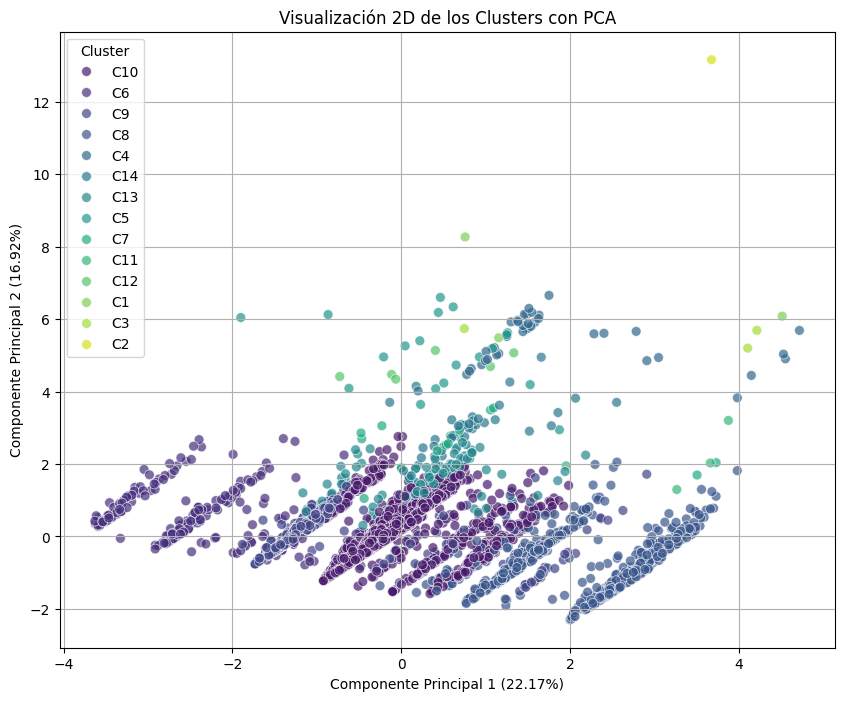

Varianza total explicada por los 2 componentes principales: 39.09%


In [168]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled2)

# Crear un DataFrame para los componentes PCA y los clusters
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = df_sample['Cluster'].reset_index(drop=True)

# Visualizar los clusters en 2D
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', legend='full', s=50, alpha=0.7)
plt.title('Visualización 2D de los Clusters con PCA')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada
total_explained_variance = pca.explained_variance_ratio_.sum() * 100
print(f"Varianza total explicada por los 2 componentes principales: {total_explained_variance:.2f}%")

# Considerar qué tan buenos parecen los grupos y el impacto de la varianza explicada.
# Una baja varianza explicada puede significar que la proyección 2D no representa bien la separación real de los clusters.

In [169]:
# Calculamos la métrica de silueta
sil_score = silhouette_score(X_scaled2, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.36


Aumentar el número de clusters mejora el un poco la métrica de silueta, pero amunetarlos demasiado hacen que disminuya al acercarse más a individuos que a grupos bien definidos.

Ahora probaremos a cambiar la el método

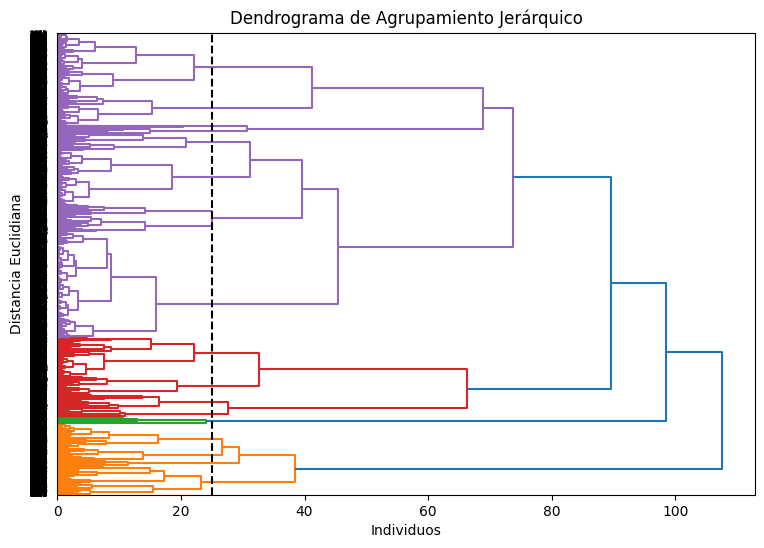

In [193]:
# Realizamos el clustering jerárquico
Z = linkage(X_scaled2, method='ward', metric="euclidean")

# Definir la distancia de corte
distancia_corte = 25

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [194]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
df_sample['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(df_sample.head())

,prov_ubi,area_ubi,tipo,sector,cod_pais,sexo,cod_edad,edad,etnia,tipo_seg,dis_pac,prov_res,area_res,fecha_ingr,fecha_egr,dia_estad,con_egrpa,esp_egrpa,cau_cie10,Cluster
978334,09,1.0,1.0,1.0,218,1.0,4.0,67.0,6.0,7.0,1.0,09,1.0,2024-04-11,2024-04-12,1.0,1.0,7.0,E115,C17
895465,17,1.0,5.0,2.0,218,2.0,4.0,13.0,6.0,1.0,1.0,17,1.0,2024-02-07,2024-02-11,4.0,1.0,10.0,K37,C10
790771,21,1.0,1.0,1.0,218,2.0,4.0,22.0,3.0,7.0,1.0,21,1.0,2024-10-21,2024-10-24,3.0,1.0,21.0,O689,C7
743020,12,1.0,5.0,1.0,218,2.0,4.0,13.0,6.0,7.0,1.0,12,2.0,2024-10-29,2024-10-29,1.0,1.0,21.0,O990,C9
35811,17,1.0,1.0,1.0,218,2.0,4.0,80.0,9.0,5.0,1.0,17,1.0,2024-02-21,2024-03-01,9.0,1.0,51.0,S819,C11


In [195]:
# Cantidades de elementos por clúster
df_sample['Cluster'].value_counts()

,count
Cluster,
C10,1147
C18,671
C13,580
C9,419
C17,335
C1,313
C4,254
C8,194
C14,186


In [196]:
# Podemos ver las medias de cada clúster
df_sample.groupby('Cluster')[vars_paciente].mean()

,edad,dia_estad,sexo,area_res,con_egrpa,etnia,dis_pac
Cluster,,,,,,,
C1,43.993610,4.757188,1.000000,1.000000,1.000000,7.725240,8.837061
C10,22.319093,2.439407,2.000000,1.000000,1.000000,6.001744,1.008718
C11,39.028736,4.132184,2.000000,1.000000,1.000000,8.528736,1.005747
C12,44.717742,5.024194,1.000000,1.000000,1.000000,8.572581,1.008065
C13,57.560345,2.427586,2.000000,1.000000,1.000000,5.998276,1.001724
C14,44.456989,14.204301,1.790323,1.000000,1.000000,6.000000,1.021505
C15,35.722222,35.375000,1.277778,1.208333,1.000000,6.319444,1.666667
C16,32.300000,85.100000,1.400000,1.300000,1.000000,5.600000,1.600000
C17,69.391045,5.194030,1.000000,1.000000,1.000000,5.994030,1.005970


In [197]:
# Calculamos la métrica de silueta
sil_score = silhouette_score(X_scaled2, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.41


En este caso el cambio de **complete** por **ward** nos dio como resultado clusters mucho más homogeneos, con calras diferencias en características claves como discapacidades, etnia, o la condición de egreso, pese al aún relativamente bajo índice de silueta podría decir que es un mejor clustering que aquellos qeu se intentaron ajustar con el uso de **complete**